In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

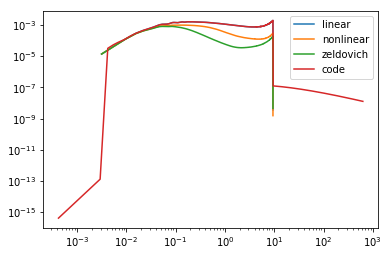

In [5]:
import sys
sys.path.append('/Users/af/Work/Cosmo/codes/1d/build')

import extruct
import numpy as np
import matplotlib.pyplot as plt


directory = 'data'
#filename = 'SPT_orders_fine_trap3.dat'
filename = 'simulation_data.pk'


def isfloat(value):
    try: 
        float(value)
        return True 
    except ValueError:
        return False  

fp = open(directory + "/" + filename)    
lines = fp.readlines()

data = [[float(v) for v in line.split()] for line in lines if all([isfloat(word) for word in line.split()]) ]
data = np.array(data)

kf = data[:,0]
pkfnl = data[:,1]
pkf = data[:,2]
pkfzel = data[:,3]


zin = 100
zfin = 0


h = 0.7 
Om = 1

L = 5
Oc = 0.00

bg = extruct.Background(zin, zfin, Om, h, Oc)
bg.integrate()

BBKS = extruct.BBKS(bg, L, True, False, 0.0244)
BBKS.A = 1e-10


pk = np.zeros(500000)
k = np.zeros(500000)


for i in range(pk.size):
    ki = i*2*np.pi/(L*2997.92348)
    if ki > kf[0] and ki < kf[-1]: 
        pki = np.interp(ki, kf, pkf)
        pki = pki/(L*2997.92348)/bg.getGrowth(0)**2
        BBKS.set_dimless(i, pki)
    
    
for i in range(pk.size):
    k[i] = (3*i+1)*2*np.pi/(L*2997.92348)
    pk[i] = BBKS.eval_dimless(3*i+1)*(L*2997.92348)
 

plt.loglog(kf, pkf/bg.getGrowth(0)**2)
plt.loglog(kf, pkfnl/bg.getGrowth(0)**2)
plt.loglog(kf, pkfzel/bg.getGrowth(0)**2)
plt.loglog(k, pk)
plt.legend(["linear", "nonlinear", "zeldovich", "code"])
plt.show()


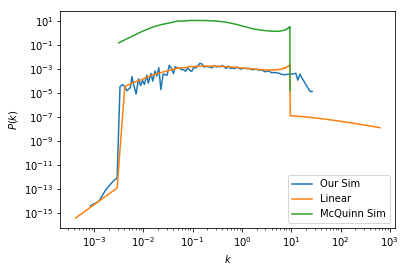

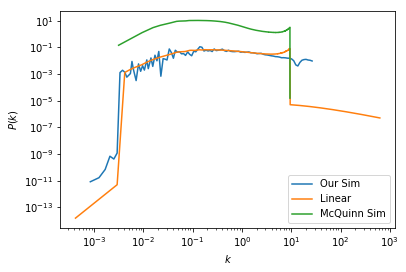

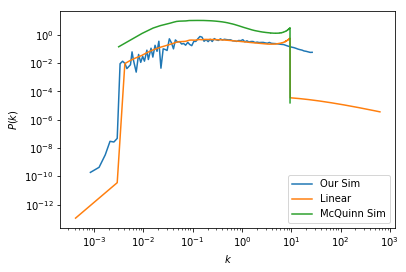

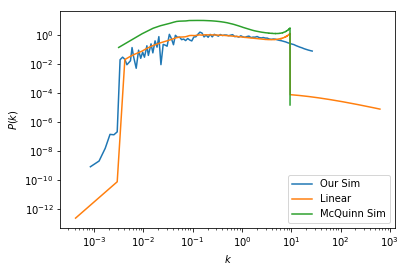

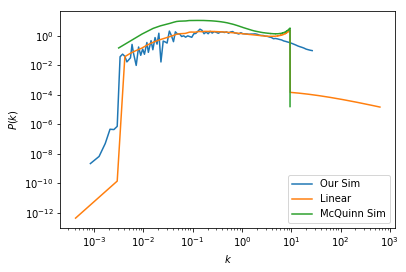

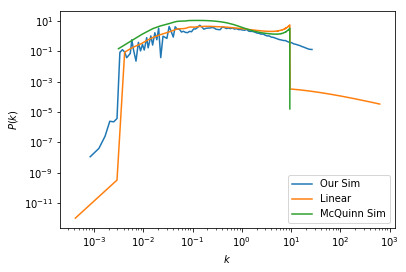

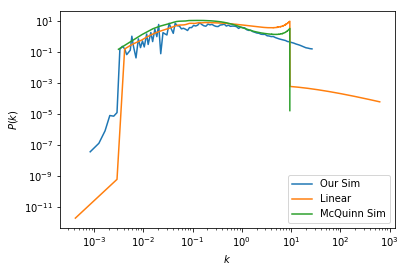

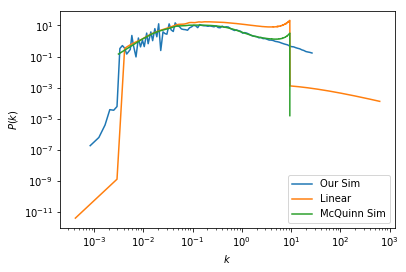

In [6]:
nParticles = 1024*8*8
god = extruct.Multiverse(0)


for i in range(1,4):
    god.bang(nParticles, bg, BBKS, L, 1) 


pkObsFFT = extruct.PowerSpectrumObs(2, np.int(110),L,1)


for z in [zin-1, 15, 5, 3, 2, 1, 0.5, 0]: 

    god.evolveAll(z)

    god.measureAll(pkObsFFT)
    pkFFT = pkObsFFT.getResult()
    plt.loglog(pkFFT[0,1:], pkFFT[1,1:])
    plt.loglog(k, bg.getGrowth(z)**2*pk)
    plt.loglog(kf, pkfnl)
    plt.legend(["Our Sim", "Linear", "McQuinn Sim"])
    plt.xlabel("$k$")
    plt.ylabel("$P(k)$")
    plt.show()
    
    


(-0.6, 0.6)

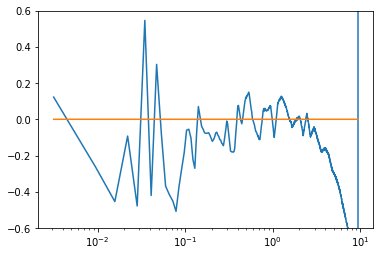

In [6]:
plt.semilogx(kf, (np.interp(kf, pkFFT[0,1:], pkFFT[1,1:]) - pkfnl)/pkfnl)
plt.semilogx(kf, 0*kf)
plt.ylim(-0.6, 0.6)

(-0.6, 0.6)

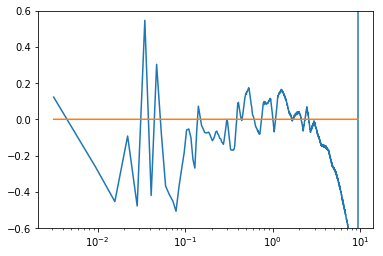

In [4]:
plt.semilogx(kf, (np.interp(kf, pkFFT[0,1:], pkFFT[1,1:]) - pkfnl)/pkfnl)
plt.semilogx(kf, 0*kf)
plt.ylim(-0.6, 0.6)

(-0.6, 0.6)

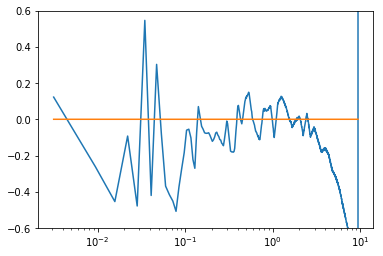

In [7]:
plt.semilogx(kf, (np.interp(kf, pkFFT[0,1:], pkFFT[1,1:]) - pkfnl)/pkfnl)
plt.semilogx(kf, 0*kf)
plt.ylim(-0.6, 0.6)